<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/LightGBM_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
df_data = pd.read_csv('titanic_data_train.csv')
df_data = df_data.drop('Name', axis=1)
df_data = df_data.drop('Ticket', axis=1)
df_data = df_data.drop('Embarked', axis=1)
df_data = df_data.drop('Sex', axis=1)
df_data = df_data.drop('Cabin', axis=1)

In [3]:
print(df_data)
print(df_data.shape)
df_data.head()

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]
(891, 7)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [4]:
#train_test_splitで学習データと評価データに分割
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_data, test_size = 0.3, random_state = 0)

In [5]:
train_y = df_train['Survived']
train_x = df_train.drop('Survived', axis=1)
val_y = df_val['Survived']
val_x = df_val.drop('Survived', axis=1)

In [6]:
#DatasetでLightGBM専用の形式に変換
trains = lgb.Dataset(train_x, train_y)
valids = lgb.Dataset(val_x, val_y)

In [7]:
#パラメータ（学習条件）を辞書型データで設定
params = {
    "objective": "regression",
    "metrics": "mae"
}
#objective:モデルの種類
#regression:回帰
#metric:どんなスコアでモデルの性能を評価するか
#rmse:平均二乗誤差の平方根

In [9]:
# モデルの学習
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=10, early_stopping_rounds=1)

[1]	valid_0's l1: 0.461354
Training until validation scores don't improve for 1 rounds.
[2]	valid_0's l1: 0.452041
[3]	valid_0's l1: 0.443666
[4]	valid_0's l1: 0.434125
[5]	valid_0's l1: 0.427579
[6]	valid_0's l1: 0.422273
[7]	valid_0's l1: 0.417192
[8]	valid_0's l1: 0.411139
[9]	valid_0's l1: 0.406206
[10]	valid_0's l1: 0.401102
Did not meet early stopping. Best iteration is:
[10]	valid_0's l1: 0.401102


In [10]:
#params:学習条件(前述の設定したもの)
#train_set:学習用データ
#test_sets:性能評価に使うデータ（metricで設定した指標で計算）
#num_boost_round:モデルを改善する回数

In [12]:
#testデータを渡して、.predictで予測
pred = model.predict(val_x)
print(pred)

[0.22818966 0.27170358 0.1665396  0.5702833  0.39726717 0.40930044
 0.71326464 0.61294088 0.60719854 0.28835887 0.26095352 0.44809942
 0.55174564 0.74275979 0.61461813 0.57836556 0.25288351 0.45488455
 0.15664189 0.53335864 0.35736752 0.64653006 0.1894249  0.28075223
 0.24205877 0.65165517 0.380123   0.46886548 0.62469182 0.26772978
 0.2399281  0.4173203  0.32534475 0.29501248 0.30109899 0.65478077
 0.13124273 0.25745298 0.36338792 0.45531974 0.55948111 0.2536953
 0.22818966 0.1546856  0.67427985 0.35161924 0.29740341 0.62954103
 0.26496775 0.58854815 0.43939222 0.48396312 0.74275979 0.21964019
 0.54750705 0.54203867 0.4262527  0.13638234 0.15794629 0.39621002
 0.35894243 0.37539593 0.58854815 0.31084401 0.31499687 0.31242577
 0.4726487  0.62469182 0.74275979 0.66538506 0.5391244  0.47200964
 0.48226064 0.33628975 0.28937814 0.51268472 0.49718354 0.47731721
 0.19633071 0.42069977 0.27993598 0.43323806 0.53525367 0.38318648
 0.40334249 0.61705341 0.45182206 0.2399281  0.37819293 0.63075

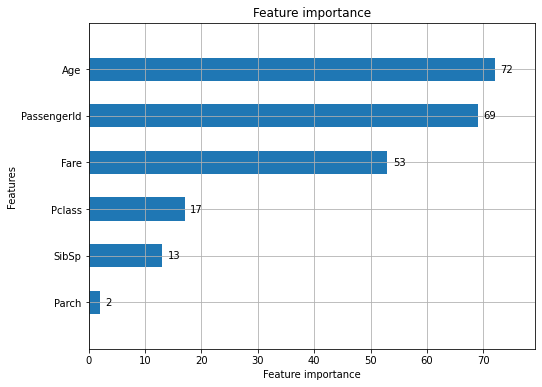

In [16]:
#特徴量の重要度を表す
import matplotlib.pyplot as plt
lgb.plot_importance(model, height = 0.5, figsize = (8,6))
plt.show()